# House Prices - Advanced Regression Techniques
(Preços de casas - Técnicas Avançadas de Regressão)

- Utilizando o [dataset disponível no Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)
    - É um dataset de **competição**
    - Temos uma base com a **descrição de cada uma das colunas (data_description.txt)**

In [2]:
# Importando o pandas
import pandas as pd

In [3]:
# Importando o dataset de treino
treino = pd.read_csv('train.csv')

In [4]:
# Visualizando essa base
treino.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [5]:
# Retornando o shape da base
treino.shape

(1460, 81)

In [6]:
# E as informações
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Começando a explorar os dados

In [8]:
# Visualizando quantidade percentual de valores vazios
(treino.isnull().sum()/treino.shape[0]).sort_values(ascending=False).head(20)*100

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
Electrical       0.068493
Id               0.000000
dtype: float64

In [9]:
# Podemos eliminar as colunas com mais de 10% de valores vazios
eliminar = treino.columns[(treino.isnull().sum()/treino.shape[0]) > 0.1]
eliminar

Index(['LotFrontage', 'Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [10]:
# Eliminando essas colunas
treino = treino.drop(eliminar, axis=1)

- Queremos criar um modelo inicial para verificar o quanto estamos errando e depois planejar como melhorar. Para isso:
    - Precisamos **retirar os valores vazios.**
    - Vamos **eliminar as colunas de texto.**
    - Vamos **escolher alguns algoritmos para testar e um método de avaliação de erro.**

In [12]:
# Retirando os valores vazios
treino = treino.fillna(-1)

In [13]:
# Verificando novamente as informações
(treino.isnull().sum()/treino.shape[0]).sort_values(ascending=False).head(3)

Id             0.0
GarageYrBlt    0.0
Fireplaces     0.0
dtype: float64

In [14]:
# Agora selecionando apenas as colunas numéricas
treino.select_dtypes("number")

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [15]:
# Criando uma nova base com esses valores
treino_num = treino.select_dtypes("number")

- Essa será nossa base inicial para começar.

## Criando nosso modelo

- **Vamos separar em treino e validação**
    - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [19]:
# Selecionando X e y
X = treino_num.drop('SalePrice', axis=1)
y = treino_num.SalePrice

In [20]:
# Importando o train_test_split
from sklearn.model_selection import train_test_split

In [21]:
# Separando essa base em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

- **O próximo passo é selecionar os algoritmos que vamos utilizar. Podemos começar com algoritmos mais simples como:**
    - Regressão Linear
        - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
    - Árvore de Regressão
        - https://scikit-learn.org/stable/modules/tree.html#regression
    - KNeighborsRegressor
        - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor

In [23]:
# Importando a regressão linear
from sklearn.linear_model import LinearRegression

In [24]:
# Criando o regressor e fazendo o fit com os dados de treino
reg_rl = LinearRegression().fit(X_train, y_train)

In [25]:
# Fazendo a previsão pros dados de validação
y_pred_rl = reg_rl.predict(X_val)

In [26]:
# Importando a árvore de regressão
from sklearn import tree

In [27]:
# Criando o regressor e fazendo o fit com os dados de treino
reg_ad = tree.DecisionTreeRegressor().fit(X_train, y_train)

In [28]:
# Fazendo a previsão
y_pred_ad = reg_ad.predict(X_val)

In [29]:
# Importando o KNN
from sklearn.neighbors import KNeighborsRegressor

In [30]:
# Criando o regressor e fazendo o fit com os dados de treino
reg_knn = KNeighborsRegressor(n_neighbors=2).fit(X_train, y_train)

In [31]:
# Fazendo a previsão
y_pred_knn = reg_knn.predict(X_val)

- **E avaliar esses dados, utilizando tanto o erro absoluto quanto o quadrático:**
    - Erro médio absoluto
        - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html
    - Erro quadrático médio
        - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

In [33]:
# Importando o erro médio absoluto
from sklearn.metrics import mean_absolute_error

In [34]:
# E o erro quadrático médio
from sklearn.metrics import mean_squared_error

In [35]:
# Avaliando o erro da regressão linear
print(mean_absolute_error(y_val, y_pred_rl).round(2))
print(mean_squared_error(y_val, y_pred_rl).round(2))

23763.19
1533982883.44


In [36]:
# da árvore de decisão
print(mean_absolute_error(y_val, y_pred_ad).round(2))
print(mean_squared_error(y_val, y_pred_ad).round(2))

27523.46
2209079160.33


In [37]:
# e do knn
print(mean_absolute_error(y_val, y_pred_knn).round(2))
print(mean_squared_error(y_val, y_pred_knn).round(2))

33273.08
2733937586.84


- **Podemos plotar visualmente a relação do y_val com as previsões feitas**
    - Para isso vamos utilizar o matplotlib
        - https://matplotlib.org/

In [39]:
# Importando o matplotlib
import matplotlib.pyplot as plt

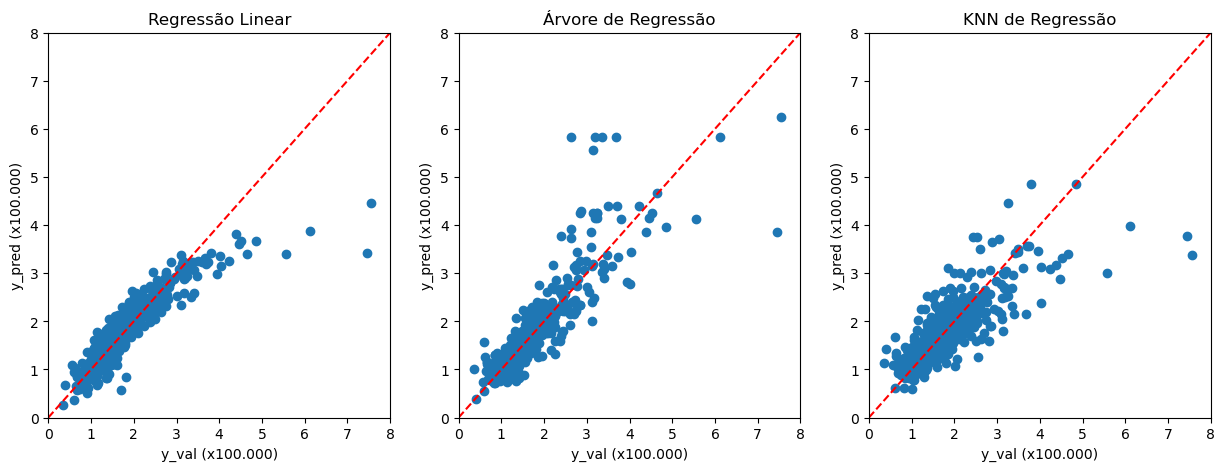

In [40]:
# Criando esse gráfico
fig, ax = plt.subplots(ncols=3, figsize=(15, 5))

ax[0].scatter(y_val/100000, y_pred_rl/100000)
ax[0].plot([0,8], [0,8], '--r')
ax[1].scatter(y_val/100000, y_pred_ad/100000)
ax[1].plot([0,8], [0,8], '--r')
ax[2].scatter(y_val/100000, y_pred_knn/100000)
ax[2].plot([0,8], [0,8], '--r')

ax[0].set(xlim=(0, 8), ylim=(0, 8))
ax[0].set_xlabel('y_val (x100.000)')
ax[0].set_ylabel('y_pred (x100.000)')
ax[0].set_title('Regressão Linear')
ax[1].set(xlim=(0, 8), ylim=(0, 8))
ax[1].set_xlabel('y_val (x100.000)')
ax[1].set_ylabel('y_pred (x100.000)')
ax[1].set_title('Árvore de Regressão')
ax[2].set(xlim=(0, 8), ylim=(0, 8))
ax[2].set_xlabel('y_val (x100.000)')
ax[2].set_ylabel('y_pred (x100.000)')
ax[2].set_title('KNN de Regressão')

plt.show()

* Interpretando o gráfico:
    * Quando temos os valores exatamente iguais é porque acertamos 100% da previsão.
    * Quanto mais distantes os valores estiverem da reta que passa por x = y, mais errada está a previsão.

- **Vamos utilizar a Regressão Linear por ter sido o algoritmo com menor erro quadrático médio, a mesma métrica avaliada pelo Kaggle na hora de classificar os modelos.**

## Fazendo a previsão para a base de teste da competição

In [44]:
# Importando a base de teste
teste = pd.read_csv('test.csv')

In [45]:
# Visualizando a base
teste

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


- **Agora vamos repetir os mesmos tratamentos que fizemos na base de treino**
    - Obs: **não podemos excluir linhas.**

In [47]:
# Eliminando as mesmas colunas da base de treino
teste = teste.drop(eliminar, axis=1)

In [48]:
# Verificando as colunas numéricas
teste.select_dtypes('number')

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,11622,5,6,1961,1961,0.0,468.0,144.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,14267,6,6,1958,1958,108.0,923.0,0.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,13830,5,5,1997,1998,0.0,791.0,0.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,9978,6,6,1998,1998,20.0,602.0,0.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,5005,8,5,1992,1992,0.0,263.0,0.0,...,506.0,0,82,0,0,144,0,0,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,1936,4,7,1970,1970,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,6,2006
1455,2916,160,1894,4,5,1970,1970,0.0,252.0,0.0,...,286.0,0,24,0,0,0,0,0,4,2006
1456,2917,20,20000,5,7,1960,1996,0.0,1224.0,0.0,...,576.0,474,0,0,0,0,0,0,9,2006
1457,2918,85,10441,5,5,1992,1992,0.0,337.0,0.0,...,0.0,80,32,0,0,0,0,700,7,2006


In [49]:
# Mantendo também apenas as colunas numéricas
teste_num = teste.select_dtypes('number')

In [50]:
# Verificando a base restante
teste_num

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,11622,5,6,1961,1961,0.0,468.0,144.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,14267,6,6,1958,1958,108.0,923.0,0.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,13830,5,5,1997,1998,0.0,791.0,0.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,9978,6,6,1998,1998,20.0,602.0,0.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,5005,8,5,1992,1992,0.0,263.0,0.0,...,506.0,0,82,0,0,144,0,0,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,1936,4,7,1970,1970,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,6,2006
1455,2916,160,1894,4,5,1970,1970,0.0,252.0,0.0,...,286.0,0,24,0,0,0,0,0,4,2006
1456,2917,20,20000,5,7,1960,1996,0.0,1224.0,0.0,...,576.0,474,0,0,0,0,0,0,9,2006
1457,2918,85,10441,5,5,1992,1992,0.0,337.0,0.0,...,0.0,80,32,0,0,0,0,700,7,2006


In [51]:
# Visualizando quantidade de valores vazios
teste_num.isnull().sum().sort_values(ascending=False).head(20)

GarageYrBlt      78
MasVnrArea       15
BsmtHalfBath      2
BsmtFullBath      2
BsmtUnfSF         1
GarageCars        1
GarageArea        1
BsmtFinSF1        1
BsmtFinSF2        1
TotalBsmtSF       1
OpenPorchSF       0
WoodDeckSF        0
Id                0
EnclosedPorch     0
TotRmsAbvGrd      0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
MoSold            0
dtype: int64

- **Podemos alterar todos esses valores vazios por -1**
    - Não vai ser confundido com o zero.
    - Depois conseguimos retornar de forma fácil os valores que fizemos esse ajuste.

In [53]:
# Trocando todos os valores vazios por -1
teste_num = teste_num.fillna(-1)

In [54]:
# Visualizando quantidade de valores vazios
teste_num.isnull().sum().sort_values(ascending=False).head(3)

Id              0
MSSubClass      0
BedroomAbvGr    0
dtype: int64

- **Agora podemos usar nosso modelo e ajustar os dados para usarmos no Kaggle.**

In [56]:
# Vamos usar a Regressão Linear para fazer a previsão
y_pred = reg_rl.predict(teste_num)

In [57]:
# Podemos adicionar essa coluna de previsão na nossa base
teste_num['SalePrice'] = y_pred

In [58]:
# E extrair somente o Id e o SalePrice
base_kaggle = teste_num[['Id', 'SalePrice']]
base_kaggle

,Id,SalePrice
0,1461,122234.995960
1,1462,139178.263684
2,1463,169872.054251
3,1464,199138.801656
4,1465,196257.109229
...,...,...
1454,2915,59584.320646
1455,2916,54459.048029
1456,2917,175307.588032
1457,2918,106132.531424


In [59]:
# Podemos então exportar essa base
base_kaggle.to_csv('resultado1.csv', index=False)